In [2]:
# 引入依赖库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据载入和总览

In [3]:
# 数据载入
data = pd.read_csv('data/2012_Federal_Election_Commission_Database.csv')
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


数据中各字段含义如下：

- cand_nm – 接受捐赠的候选人姓名
- contbr_nm – 捐赠人姓名
- contbr_st – 捐赠人所在州
- contbr_employer – 捐赠人所在公司
- contbr_occupation – 捐赠人职业
- contb_receipt_amt – 捐赠数额（美元）
- contb_receipt_dt – 收到捐款的日期

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001731 non-null  object 
 1   contbr_nm          1001731 non-null  object 
 2   contbr_st          1001727 non-null  object 
 3   contbr_employer    988002 non-null   object 
 4   contbr_occupation  993301 non-null   object 
 5   contb_receipt_amt  1001731 non-null  float64
 6   contb_receipt_dt   1001731 non-null  object 
dtypes: float64(1), object(6)
memory usage: 53.5+ MB


In [5]:
data.describe()

,contb_receipt_amt
count,1.001731e+06
mean,2.982352e+02
std,3.749667e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


## 数据清洗

### 缺失值处理

In [60]:
# 从data.info()得知，contbr_employer、contbr_occupation均有少量缺失值,均填充为NOT PROVIDED
data['contbr_employer'].fillna('NOT PROVIDED', inplace=True)
data['contbr_occupation'].fillna('NOT PROVIDED', inplace=True)
data.head(20)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican
5,"Bachmann, Michelle","BECKMAN, JAMES",AR,NONE,RETIRED,500.0,23-JUN-11,Republican
6,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NOT PROVIDED,NOT PROVIDED,250.0,21-JUN-11,Republican
7,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,05-JUL-11,Republican
8,"Bachmann, Michelle","COLLINS, SARAH",AZ,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,Republican
9,"Bachmann, Michelle","COLEMAN, RONALD",AZ,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,Republican


### 数据转换

#### 利用字典映射进行转换：党派分析

美国大选一般有民主党和共和党之争，可以更具候选人名称得到其对应的党派信息。

In [7]:
data['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
len(data['cand_nm'].unique())

13

可以看出本数据中2012年竞选总统总共有13位候选人

In [9]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

增加 `party` 列存储党派信息

In [10]:
data['party'] = data['cand_nm'].map(parties)
data['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [ ]:
可以看出Democrat（民主党）获得的赞助次数比Republican（共和党）更多一些

In [65]:
data.groupby('party')['contb_receipt_amt'].sum()

party
Democrat      1.358774e+08
Republican    1.736539e+08
Name: contb_receipt_amt, dtype: float64

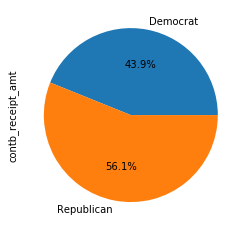

In [66]:
data.groupby('party')['contb_receipt_amt'].sum().plot(kind='pie',autopct='%1.1f%%')

可以看出Democrat（民主党）获得的赞助金额比Republican（共和党）要少一些

#### 排序：按照职业汇总对赞助总金额进行排序

In [13]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED                                   48176447.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

按照职位进行汇总，计算赞助总金额，展示前20项，发现不少职业是相同的，只不过是表达不一样而已，如C.E.O.与CEO，都是一个职业

> DataFrame.sort_values(by, ascending=True, inplace=False)

> by是根据哪一列进行排序，可以传入多列；ascending=True是升序排序，False为降序；inplace=Ture则是修改原dataframe，默认为False

#### 利用函数进行数据转换：职业与雇主信息分析

许多职业都涉及相同的基本工作类型，下面我们来清理一下这样的数据（这里巧妙地利用了dict.get它允许没有映射关系的职业也能“通过”）

In [14]:
#建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO
occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}

# 如果不在字典中,返回x
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)

In [15]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)

### 数据筛选

#### 赞助金额筛选

赞助包括退款（负的出资额），为了简化分析过程，我们限定数据集只有正出资额

In [17]:
data = data[data['contb_receipt_amt'] > 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cand_nm            991475 non-null  object 
 1   contbr_nm          991475 non-null  object 
 2   contbr_st          991471 non-null  object 
 3   contbr_employer    991475 non-null  object 
 4   contbr_occupation  991475 non-null  object 
 5   contb_receipt_amt  991475 non-null  float64
 6   contb_receipt_dt   991475 non-null  object 
 7   party              991475 non-null  object 
dtypes: float64(1), object(7)
memory usage: 68.1+ MB


#### 候选人筛选

In [68]:
#查看各候选人获得的赞助总金额
contb_receipt_amt_count = data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)
contb_receipt_amt_count

cand_nm
Obama, Barack                     1.358774e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030575e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

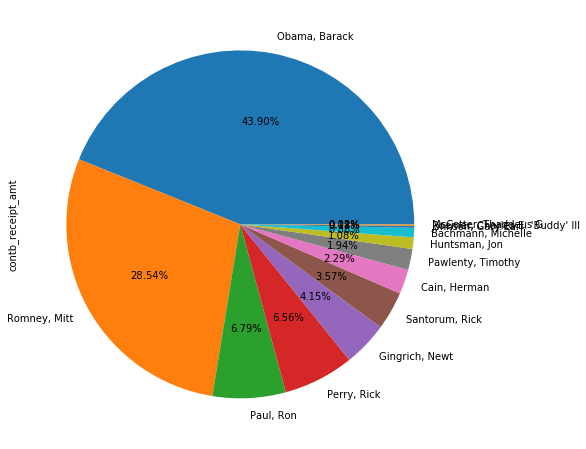

In [76]:
contb_receipt_amt_count.plot(kind='pie', figsize=(8,8), autopct='%1.2f%%')

In [19]:
#选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()

#### 面元化数据

In [20]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
labels


411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [79]:
labels.value_counts()

(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(1, 10]                 43751
(0, 1]                    570
(1000000, 10000000]         4
(100000, 1000000]           3
(10000, 100000]             3
Name: contb_receipt_amt, dtype: int64

可以看出捐赠金额在\$10~\$100之间的人最多

## 数据聚合与分组运算

分组计算Grouping，分组运算是一个“split-apply-combine”的过程：

- 拆分，pandas对象中的数据会根据你所提供的一个或多个键被拆分为多组
- 应用，将一个函数应用到各个分组并产生一个新值
- 合并，所有这些函数的执行结果会合并到最终的结果对象中


### 透视表(pivot_table)分析党派和职业

我们可以通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资不足200万美元的数据：

In [27]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
#过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14302461.84,7.868419e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
MANAGER,762883.22,1.444532e+06
NOT PROVIDED,13725187.32,2.097161e+07


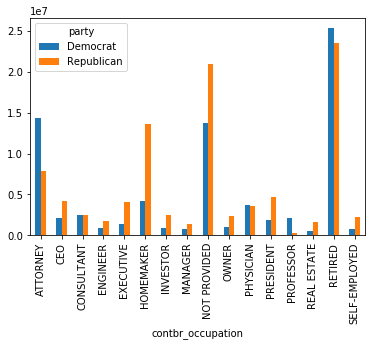

In [29]:
over_2mm.plot(kind='bar')

### 分组级运算和转换

#### 根据职业与雇主信息分组运算

我们接下来了解一下对Obama和Romney总出资最高的职业和雇主。注意，这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”

In [31]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

def get_top_amounts(group,key,n=5):
#传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
  
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=10)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             14302461.84
               NOT PROVIDED         13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
               CEO                   2074974.79
               PRESIDENT             1878509.95
               NOT EMPLOYED          1709188.20
Romney, Mitt   NOT PROVIDED         11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
               INVESTOR              1537595.12
               CONSULTANT            1424894.01
               PHYSICIAN             1368023.96
Name: c

从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持

In [32]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDED          13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

In [33]:
#labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [34]:
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


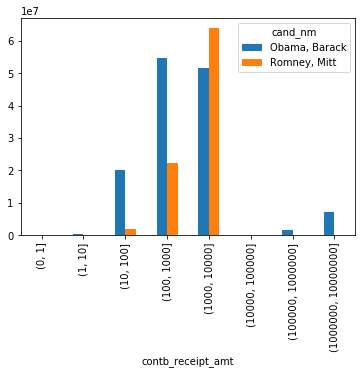

In [36]:
bucket_sums.plot(kind='bar')

In [37]:
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


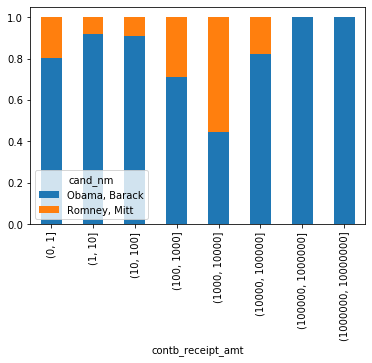

In [40]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums.plot(kind='bar',stacked=True)

#### 按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

In [50]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
SEBAG, DAVID             161
SMITH, ERIK              145
FALLSGRAFF, TOBY         138
SKINNER, DONNA           136
CASPERSON, CAROLINA      132
HARRIS, CLAUDIA W.       132
ROSBERG, MARILYN         115
POTTS, LILLIE            114
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
DFHDFH, DFHDFH            96
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
SMITH, CHARLES            88
KARIMIAN, AFSANEH         87
NURU, ISAAC               87
MASTERS, MARGERY          85
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64

## 时间处理

### str转datetime

我们可以使用 `to_datetime` 方法解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快。我们也可以指定特定的日期解析格式，如 `pd.to_datetime(series,format='%Y%m%d')`

In [52]:
data_vs['time'] = pd.to_datetime(data_vs['contb_receipt_dt'])
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,time
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican,2012-02-01
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican,2012-02-01
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican,2012-04-13
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican,2011-08-21
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican,2012-03-07


### 以时间作为索引

In [53]:
data_vs.set_index('time',inplace=True)
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
time,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


### 重采样和频度转换

重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样。


In [55]:
vs_time = data_vs.groupby('cand_nm').resample('M')['cand_nm'].count()
vs_time

cand_nm        time      
Obama, Barack  2011-04-30     13830
               2011-05-31     12182
               2011-06-30     25626
               2011-07-31     12372
               2011-08-31     19860
               2011-09-30     46926
               2011-10-31     25941
               2011-11-30     32629
               2011-12-31     63562
               2012-01-31     40055
               2012-02-29     66416
               2012-03-31    123564
               2012-04-30    106164
Romney, Mitt   2011-04-30      1096
               2011-05-31      4163
               2011-06-30      5757
               2011-07-31      2454
               2011-08-31      3226
               2011-09-30      7968
               2011-10-31      5349
               2011-11-30      7737
               2011-12-31     10289
               2012-01-31      9431
               2012-02-29     13396
               2012-03-31     17807
               2012-04-30     16482
Name: cand_nm, dtype: int64

In [56]:
vs_time.unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
time,,
2011-04-30,13830,1096
2011-05-31,12182,4163
2011-06-30,25626,5757
2011-07-31,12372,2454
2011-08-31,19860,3226
2011-09-30,46926,7968
2011-10-31,25941,5349
2011-11-30,32629,7737
2011-12-31,63562,10289


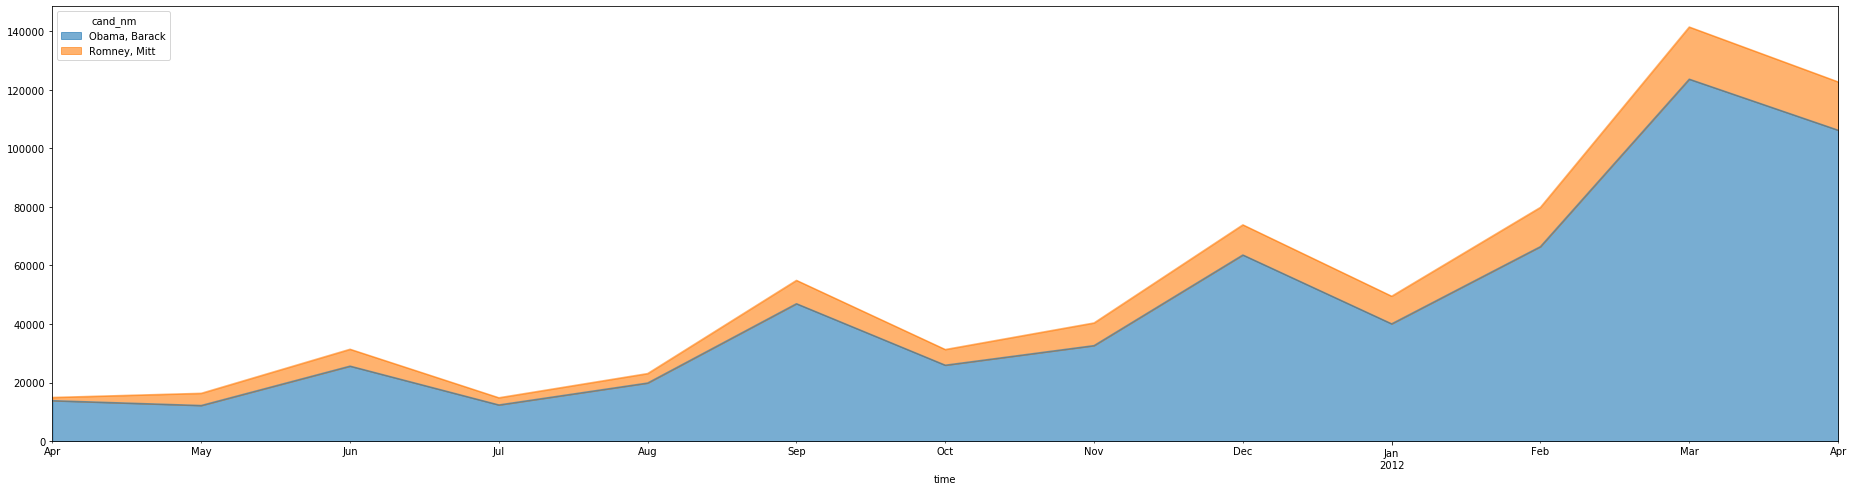

In [59]:
fig1, ax1=plt.subplots(figsize=(32,8))
vs_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()